# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


# Выполнил студент Валишин Марк Романович группы БСТ2105
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [ ]:
import time
import random
import math
import copy
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

1 - для генерации матрицы смежности,
2 - для вызова из файла: 1
Введите количество вершин: 10
Мин вес ребра: 1
Макс вес ребра: 10
Матрица смежности:
[0, 5, 4, 1, 3, 0, 0, 0, 10, 6]
[5, 0, 7, 0, 4, 0, 1, 8, 1, 0]
[4, 7, 0, 0, 6, 0, 10, 2, 9, 0]
[1, 0, 0, 0, 2, 3, 0, 10, 0, 7]
[3, 4, 6, 2, 0, 0, 0, 9, 0, 4]
[0, 0, 0, 3, 0, 0, 8, 9, 10, 3]
[0, 1, 10, 0, 0, 8, 0, 4, 0, 0]
[0, 8, 2, 10, 9, 9, 4, 0, 2, 1]
[10, 1, 9, 0, 0, 10, 0, 2, 0, 0]
[6, 0, 0, 7, 4, 3, 0, 1, 0, 0]


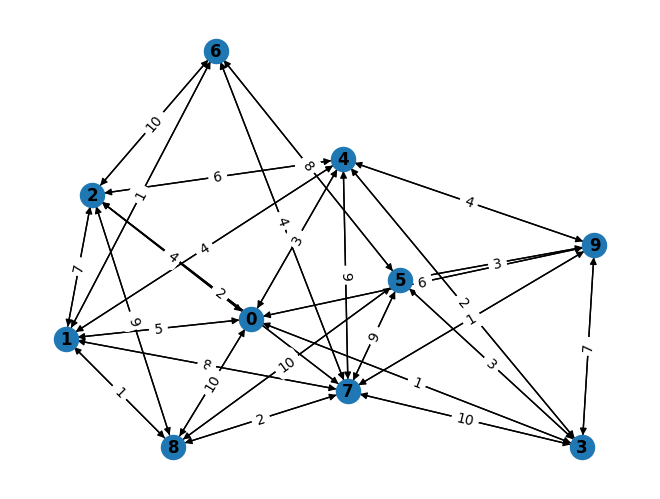

In [ ]:
def generate_matrix(num_nodes: int, density: float, min: int, max: int) -> list[list]:
    """
    Генерирует матрицу смежности для взвешенного графа с заданным числом узлов и плотностью связей.
    :param num_nodes: количество узлов в графе
    :param density: плотность связей в графе (от 0 до 1)
    """
    # Создаем пустую матрицу смежности
    adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]

    # Заполняем матрицу смежности ребрами
    for i in range(num_nodes):
        for k in range(0, i):
            adj_matrix[i][k] = adj_matrix[k][i]
        for j in range(i, num_nodes):
            if i == j:
                adj_matrix[i][j] = 0
            elif random.random() < density:
                weight = random.randint(min, max)
                adj_matrix[i][j] = weight
#     for i in range(len(adj_matrix)):
#         for j in range(len(adj_matrix)):
#             if i != j and adj_matrix[i][j] == 0:
#                 adj_matrix[i][j] = math.inf

    return adj_matrix


if int(input("1 - для генерации матрицы смежности,\n2 - для вызова из файла: ")) == 1:
    adj_matrix = generate_matrix(int(input("Введите количество вершин: ")), 0.6, int(input("Мин вес ребра: ")),
                                     int(input("Макс вес ребра: ")))
else:
    with open("sources/matrix1.txt", "r") as f:
        adj_matrix = []
        for str in f:
            adj_matrix.append(list(map(int, str.split())))

# Выводим матрицу смежности на экран
print("Матрица смежности:")
for row in adj_matrix:
    print(row)

# Выводим граф на экран
G = nx.from_numpy_array(np.matrix(adj_matrix), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
edge_weight = nx.get_edge_attributes(G, "weight")
nx.draw(G, layout, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_weight)
plt.show()

for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        if i != j and adj_matrix[i][j] == 0:
            adj_matrix[i][j] = math.inf

## Алгоритм Флойда-Уоршелла

In [ ]:
# Алгоритм Флойда-Уоршелла Алгоритм Флойда-Уоршелла находит кратчайшие пути между каждой парой вершин в графе. 
# Он основан на динамическом программировании и имеет сложность O(n^3)
def get_path(P: list, u: int, v: int) -> list[int]:
    path = [u]
    while u != v:
        u = P[u][v]
        path.append(u)
    return path


def floyd(matrix: list, start=0, end=len(adj_matrix) - 1) -> tuple[list, int]:
    N = len(matrix)  # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]  # начальный список предыдущих вершин для поиска кратчайших маршрутов
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = matrix[i][k] + matrix[k][j]
                if matrix[i][k] < math.inf and matrix[k][j] < math.inf and matrix[i][j] > matrix[i][k] + matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
                    P[i][j] = P[i][k]  # номер промежуточной вершины при движении от i к j
    min_path = get_path(P, start, end)
    if len(min_path) == 2 and matrix[start][end] == math.inf:
        return [], 0
    return min_path, matrix[start][end]

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
matrix = copy.deepcopy(adj_matrix)
path, dist = floyd(matrix, start, end)
print(f"{path} минимальный путь, {dist} минимальное расстояние")

Start: 0
End: 4
[0, 4] минимальный путь, 3 минимальное расстояние


### Алгоритм Дейкстры

In [ ]:
# Алгоритм Дейкстры - это алгоритм поиска кратчайшего пути во взвешенном графе с неотрицательными весами ребер. 
# Он начинает работу с заданной начальной вершины и находит кратчайший путь до каждой другой вершины в графе.
def dijkstra(adj_matrix: list, start: int, end=len(adj_matrix) - 1) -> tuple[list, list]:
    n = len(adj_matrix)
    visited = [False] * n
    distance = [math.inf] * n
    path = [[] for _ in range(n)]
    distance[start] = 0
    path[start].append(start)

    for _ in range(n):
        u = min_distance_index(distance, visited)
        visited[u] = True
        for v in range(n):
            if adj_matrix[u][v] != 0 and not visited[v]:
                if distance[u] + adj_matrix[u][v] < distance[v]:
                    distance[v] = distance[u] + adj_matrix[u][v]
                    path[v] = path[u] + [v]

    return path, distance


def min_distance_index(distance: int, visited: list) -> int:
    min_distance = math.inf
    min_index = -1
    for i in range(len(distance)):
        if not visited[i] and distance[i] < min_distance:
            min_distance = distance[i]
            min_index = i
    return min_index

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
matrix = copy.deepcopy(adj_matrix)
path, dist = dijkstra(matrix, start)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 4] минимальный путь, 3 минимальное расстояние


### Алгоритм Беллмана-Форда

In [ ]:
# Алгоритм Беллмана-Форда - это алгоритм поиска кратчайшего пути во взвешенном графе с отрицательными весами ребер. 
# Он работает путем итеративного обновления расстояний до каждой вершины в графе. Релаксировать
def bellman_ford(matrix: list, start=0, end=len(adj_matrix) - 1) -> tuple[list, list]:
    path_lengths = [math.inf for item in matrix]
    path_lengths[start] = 0
    paths = [[start] for item in matrix]
    n = len(matrix)

    for i in range(n):
        for u in range(n):
            for v in range(n):
                if path_lengths[u] != math.inf and matrix[u][v] != math.inf and path_lengths[v] > path_lengths[u] + \
                        matrix[u][v]:
                    path_lengths[v] = path_lengths[u] + matrix[u][v]
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
    if len(paths[end]) == 1:
        return [], 0
    return paths, path_lengths

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
matrix = copy.deepcopy(adj_matrix)
path, dist = bellman_ford(matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 4] минимальный путь, 3 минимальное расстояние


### Алгоритм Джонсона

In [ ]:
# Алгоритм Джонсона находит кратчайшие пути между каждой парой вершин в графе. 
# Он использует алгоритм Беллмана-Форда для поиска новых весов ребер и имеет сложность O(VE + V^2 log V)
def johnson(matrix: list, start=0, end=len(adj_matrix) - 1) -> tuple[list, list]:
    n = len(matrix)
    mat_new = matrix.copy()  # создаем матрицу смежности с новой вершиной
    for item in mat_new:
        item.append(math.inf)  # прежние вершины не имеют пути до новой
    mat_new.append([])
    for i in range(len(mat_new)):
        mat_new[-1].append(0)  # длина ребер от новой вершины до старых равняется нулю
    # применяем алогритм Беллмана_форда для обновленного графа
    paths, bell_dist = bellman_ford(mat_new, len(mat_new) - 1, 0)  
    for u in range(n):
        for v in range(n):
            if matrix[u][v] != math.inf and bell_dist[u] != math.inf and bell_dist[v] != math.inf:
                matrix[u][v] += bell_dist[u] - bell_dist[v]  # изменяем значения рёбер по формуле
    final_dist = []
    final_paths = []
    for i in range(n - 1):  # применяем алгоритм Дейкстры для графа с обновленными весами рёбер
        path, dist = dijkstra(matrix, i, n - 1)
        final_dist.append(dist)
        final_paths.append(path)
    final_dist.append([])
    final_paths.append([])
    for i in range(n):
        final_paths[-1].append([end])
        if i == n - 1:
            final_dist[-1].append(start)
        else:
            final_dist[-1].append(math.inf)
    if len(final_paths[start][end]) == 1:
        return [], 0
    return final_paths, final_dist

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
matrix = copy.deepcopy(adj_matrix)
path, dist = johnson(matrix, start, end)
print(f"{path[end][start]} минимальный путь, {dist[start][end]} минимальное расстояние")

Start: 0
End: 4
[4, 0] минимальный путь, 3 минимальное расстояние


### Алгоритм Левита

In [ ]:
# Алгоритм Левита: находит кратчайший путь от одной вершины до всех остальных вершин в графе, 
# используя очередь с приоритетом и вспомогательный массив. 
# Сложность алгоритма Левита составляет O(E + V log V)
def levit(matrix: list, start=0, end=len(adj_matrix) - 1) -> tuple[list, list]:
    n = len(matrix)
    M0 = set()  # множество вершин, расстояния до которых уже вычислены (возможно неокончательно)
    M1 = {'main': [start], 'urgent': []}  # вершины, расстояния до которых вычисляются
    M2 = set(range(1, n + 1))  # вершины, расстояния до которых ещё не вычислены
    dist = [math.inf for item in matrix]
    dist[start] = 0
    paths = [[start] for item in matrix]
    while len(M1['main']) or len(M1['urgent']):
        if len(M1['urgent']):
            u = M1['urgent'].pop(0)
        else:
            u = M1['main'].pop(0)
        for v in range(n):
            if dist[u] == math.inf or matrix[u][v] == math.inf:
                continue
            if v in M2:
                M2.remove(v)
                M1['main'].append(v)
                if dist[v] > dist[u] + matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + matrix[u][v]
            elif v in M1['main'] or v in M1['urgent']:
                if dist[v] > dist[u] + matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + matrix[u][v]
            elif v in M0 and dist[v] > dist[u] + matrix[u][v]:
                M0.remove(v)
                M1['urgent'].append(v)
                dist[v] = dist[u] + matrix[u][v]
                paths[v] = paths[u].copy()
                paths[v].append(v)
        M0.add(u)
    if len(paths[end]) == 1:
        return [], 0
    return paths, dist

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
matrix = copy.deepcopy(adj_matrix)
path, dist = levit(matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 4] минимальный путь, 3 минимальное расстояние


### Алгоритм Йена

In [ ]:
# Алгоритм Йена: находит K кратчайших путей между двумя вершинами в графе, 
# используя алгоритм Дейкстры и поиск путей с наименьшим количеством ребер.
# Сложность алгоритма Йена составляет O(K * E log V)
# K = число мин. путей которые можно найти (нумерация с нуля)
def yen(adj_matrix: list, matrix: list, start=0, end=len(adj_matrix) - 1, K=0) -> tuple:
    n = len(matrix)
    candidates = set()
    original_paths, original_dists = dijkstra(adj_matrix, start, end)
    paths = [original_paths[end]]
    lengths = [original_dists[end]]
    for k in range(K):
        for i in range(len(paths[-1]) - 1):
            # постепенно выбираем корневой путь и вершину ветвления
            spur_node = paths[-1][i]
            root_path = paths[-1][:i + 1]
            for j in range(len(root_path)):  # удаляем из графа вершины, идущие в пути перед вершиной ветвления 
                if root_path[j] != spur_node:  # (к ним мы не можем возвращаться)
                    matrix[root_path[j]] = [math.inf for l in range(len(matrix))]
            for path in paths:  # в списке path находим пути, которые начинаются с корневого пути
                if root_path == path[:i + 1]:
                    # удаляем следующие ребра в найденных путях, чтоб начать минимальное ветвление
                    matrix[path[i]][path[i + 1]] = math.inf
            original_paths, original_dists = dijkstra(matrix, spur_node,
                                                      end)  # находим кратчайший путь в изменёном графе
            if len(original_paths):
                total_dist = 0
                # определяем путь ветвления без начальной вершины в найденном пути, т.к. она есть в корневом пути
                spur_path = original_paths[end][1:]
                total_path = root_path
                total_path.extend(spur_path)
                total_path = tuple(total_path)  # преобразовываем список в кортеж, чтобы добавить его в набор кандидатов
                for j in range(len(total_path) - 1):
                    total_dist += adj_matrix[total_path[j]][total_path[j + 1]]
                candidates.add((total_path, total_dist))
        if not candidates:
            break
        # преобразовавыем набор кандидатов в список чтобы остортировать его по длинам маршртуа
        sorted_candidates = list(candidates)
        sorted_candidates.sort(key=lambda x: x[1])
        paths.append(list(sorted_candidates[0][0]))  # добавляем в список paths минимальный путь
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0])  # удаляем минимальный путь из набора кандидатов
    return paths, lengths

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
matrix = copy.deepcopy(adj_matrix)
path, dist = yen(adj_matrix ,matrix, start, end)
print(f"{path} минимальный путь, {dist[0]} минимальное расстояние")

Start: 0
End: 4
[[0, 4]] минимальный путь, 3 минимальное расстояние


### Сравнение алгоритмов

In [ ]:
matrices = [] #коллекция матриц смежностей графов
for i in range(1,11):
    a = generate_matrix(50*i, 0.8, 1, 100)
    matrices.append(a)

### Флойд-Йоршелл

In [ ]:
elements = []
times_floyd = list()
for k in range(len(matrices)):
    a = copy.copy(matrices[k])
    start = time.perf_counter()
    floyd(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    elements.append(50*(k+1))
    times_floyd.append(end-start)

50 вершин:  0.06 cекунд
100 вершин:  0.57 cекунд
150 вершин:  2.86 cекунд
200 вершин:  3.5 cекунд
250 вершин:  7.06 cекунд
300 вершин:  13.53 cекунд
350 вершин:  21.74 cекунд
400 вершин:  32.6 cекунд
450 вершин:  44.16 cекунд
500 вершин:  62.04 cекунд


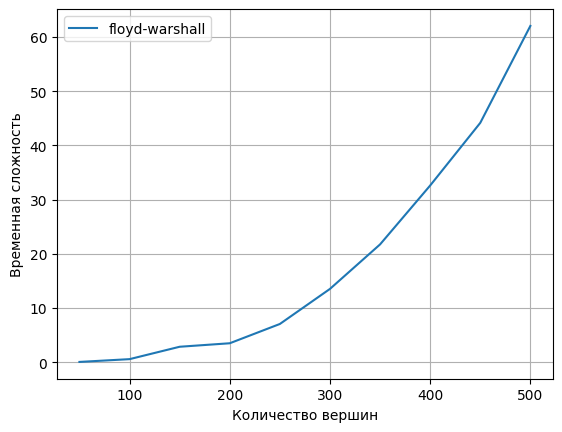

In [ ]:
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_floyd, label ='floyd-warshall')
plt.grid()
plt.legend()
plt.show() 

### Дейкстра

In [ ]:
elements = []
times_dijkstra = list()
for k in range(len(matrices)):
    a = copy.copy(matrices[k])
    start = time.perf_counter()
    dijkstra(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    elements.append(50*(k+1))
    times_dijkstra.append(end-start)


50 вершин:  0.0 cекунд
100 вершин:  0.0 cекунд
150 вершин:  0.01 cекунд
200 вершин:  0.0 cекунд
250 вершин:  0.01 cекунд
300 вершин:  0.01 cекунд
350 вершин:  0.02 cекунд
400 вершин:  0.02 cекунд
450 вершин:  0.03 cекунд
500 вершин:  0.03 cекунд


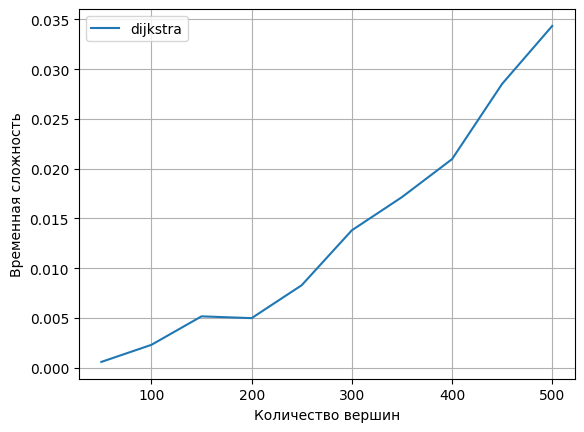

In [ ]:
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_dijkstra, label ='dijkstra')
plt.grid()
plt.legend()
plt.show()

### Беллман-Форд

In [ ]:
times_bellman = list()
for k in range(len(matrices)):
    a = copy.copy(matrices[k])
    start = time.perf_counter()
    bellman_ford(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_bellman.append(end-start)

50 вершин:  0.06 cекунд
100 вершин:  0.31 cекунд
150 вершин:  1.07 cекунд
200 вершин:  2.47 cекунд
250 вершин:  4.77 cекунд
300 вершин:  9.69 cекунд
350 вершин:  14.91 cекунд
400 вершин:  24.44 cекунд
450 вершин:  35.08 cекунд
500 вершин:  43.04 cекунд


In [ ]:
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_bellman, label ='bellman_ford')
plt.grid()
plt.legend()
plt.show()

### Джонсон

In [ ]:
times_johnson = list()
for k in range(len(matrices)):
    a = copy.copy(matrices[k])
    start = time.perf_counter()
    johnson(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_johnson.append(end-start)

50 вершин:  0.06 cекунд
100 вершин:  0.57 cекунд
150 вершин:  1.51 cекунд
200 вершин:  4.95 cекунд
250 вершин:  6.75 cекунд
300 вершин:  13.23 cекунд
350 вершин:  21.75 cекунд
400 вершин:  31.37 cекунд
450 вершин:  46.37 cекунд
500 вершин:  63.09 cекунд


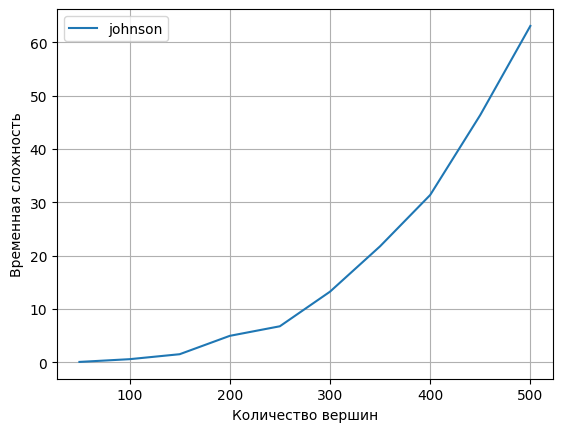

In [ ]:
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_johnson, label ='johnson')
plt.grid()
plt.legend()
plt.show()

### Левит

50 вершин:  0.0 cекунд
100 вершин:  0.01 cекунд
150 вершин:  0.03 cекунд
200 вершин:  0.04 cекунд
250 вершин:  0.09 cекунд
300 вершин:  0.15 cекунд
350 вершин:  0.2 cекунд
400 вершин:  0.31 cекунд
450 вершин:  0.43 cекунд
500 вершин:  0.53 cекунд


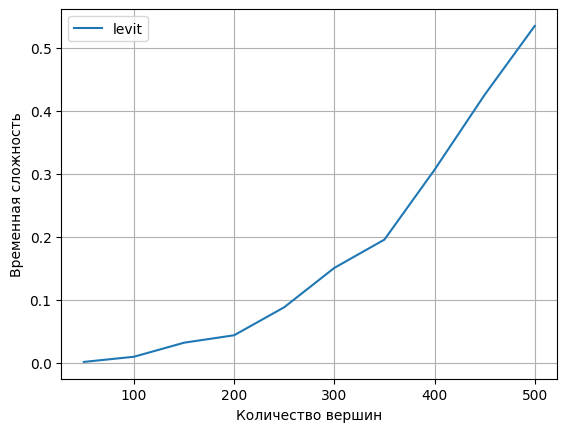

In [ ]:
times_levit = list()
for k in range(len(matrices)):
    a = copy.copy(matrices[k])
    start = time.perf_counter()
    levit(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_levit.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_levit, label ='levit')
plt.grid()
plt.legend()
plt.show()

### Йен

50 вершин:  0.0 cекунд
100 вершин:  0.01 cекунд
150 вершин:  0.02 cекунд
200 вершин:  0.02 cекунд
250 вершин:  0.03 cекунд
300 вершин:  0.05 cекунд
350 вершин:  0.08 cекунд
400 вершин:  0.08 cекунд
450 вершин:  0.11 cекунд
500 вершин:  0.15 cекунд


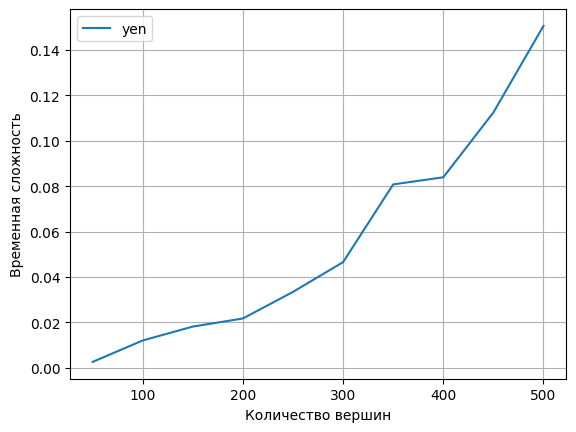

In [ ]:
times_yen = list()
for k in range(len(matrices)):
    a = copy.copy(matrices[k])
    start = time.perf_counter()
    yen(a, copy.deepcopy(a), 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_yen.append(end-start)
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_yen, label ='yen')
plt.grid()
plt.legend()
plt.show()

### Общий график

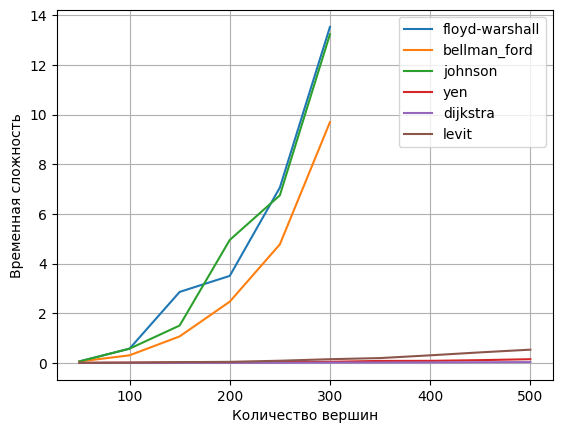

In [ ]:
#общий график - сравнение алгоритмов
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements[:6], times_floyd[:6], label ='floyd-warshall')
plt.plot(elements[:6], times_bellman[:6], label ='bellman_ford')
plt.plot(elements[:6], times_johnson[:6], label ='johnson')
plt.plot(elements, times_yen, label ='yen')
plt.plot(elements, times_dijkstra, label ='dijkstra')
plt.plot(elements, times_levit, label ='levit')

plt.grid()
plt.legend()
plt.show()

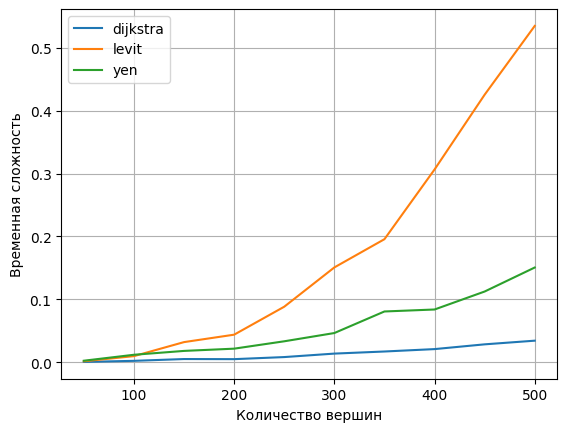

In [ ]:
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_dijkstra, label ='dijkstra')
plt.plot(elements, times_levit, label ='levit')
plt.plot(elements, times_yen, label ='yen')
plt.grid()
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'Дейкстра': [times_dijkstra[i] for i in range(10)],
                   'Йен': [times_yen[i] for i in range(10)],
                   'Левит': [times_levit[i] for i in range(10)],
                   'Беллман-Форд': [times_bellman[i] for i in range(10)],
                   'Флойд-Уоршелл': [times_floyd[i] for i in range(10)],
                   'Джонсон': [times_johnson[i] for i in range(10)]}, index=elements).round(4)

df

,Дейкстра,Йен,Левит,Беллман-Форд,Флойд-Уоршелл,Джонсон
50,0.0006,0.0025,0.0016,0.0586,0.0624,0.0608
100,0.0023,0.0119,0.0098,0.3064,0.5744,0.5745
150,0.0052,0.0181,0.0321,1.0683,2.8598,1.5061
200,0.0050,0.0217,0.0439,2.4669,3.5047,4.9511
250,0.0083,0.0334,0.0883,4.7729,7.0605,6.7478
300,0.0138,0.0465,0.1508,9.6934,13.5286,13.2315
350,0.0171,0.0808,0.1957,14.9068,21.7376,21.7469
400,0.0210,0.0839,0.3065,24.4380,32.6014,31.3667
450,0.0285,0.1125,0.4254,35.0771,44.1579,46.3749
500,0.0344,0.1507,0.5348,43.0370,62.0390,63.0870


### Вывод